#Step 1: Imports

In [151]:
import numpy as np
import pandas as pd


#Step 2: Enviroment Setup

In [312]:
from google.colab import drive
drive.mount('/content/drive/')

from sklearn.model_selection import train_test_split

# Read the data
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Projects/Housing Price Prediction/train.csv', delimiter=',')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Projects/Housing Price Prediction/test.csv', delimiter=',')


# cols = ['Id', 'LotArea', 'Street',
#        'Alley','Utilities', 'Neighborhood','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
#        'MasVnrArea','1stFlrSF', '2ndFlrSF','FullBath',
#        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
#        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
#        'GarageCars', 'GarageArea', 'GarageQual',
#        'GarageCond','PoolArea', 'PoolQC',
#        'Fence']

print(X_test)

X_train.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_train.SalePrice
X_train.drop(['SalePrice'], axis=1, inplace=True)

X_test_ID = X_test['Id']



# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)




# print("X_train: ")
print(X_train.columns)
# print(X_test.shape)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   


#Step 3: Data Exploration

Graph data


In [138]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,1168.000000,956.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,738.685788,56.605308,69.614017,10589.672945,6.086473,5.572774,1970.890411,1984.692637,103.481067,439.890411,...,473.632705,94.498288,48.044521,23.022260,3.218322,14.528253,2.118151,50.936644,6.301370,2007.819349
std,421.609683,42.172322,22.946069,10704.180793,1.367472,1.116908,30.407486,20.684612,182.676225,435.106803,...,209.442320,127.312017,68.619199,63.153093,27.916593,54.009608,36.482294,550.380636,2.725977,1.335971
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,373.750000,20.000000,59.000000,7589.500000,5.000000,5.000000,1953.750000,1966.000000,0.000000,0.000000,...,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,749.500000,50.000000,69.000000,9512.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,379.500000,...,477.500000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1108.750000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,167.750000,716.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


#Step 4: Data Preprocesing




In [313]:
from typing_extensions import dataclass_transform
from sklearn.compose import ColumnTransformer #To combine together two preprocessing methods
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer #For numerical
from sklearn.preprocessing import OneHotEncoder #For Catagorical
from sklearn.preprocessing import LabelEncoder #For Catagorical
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OrdinalEncoder




#Extract all numerical columns you want to use
def cleanData(data):
  data = data.drop(["Id", "FireplaceQu", "MasVnrType"], axis=1)
  invalid_columns = [col for col in X_train.columns if X_train[col].isnull().sum() > number_of_records//2 ]
  data.drop(invalid_columns, axis = 1)

  return data



def fillNA(data):
  data_not_object = data.select_dtypes(exclude=["object"])

  data_object = data.select_dtypes(include=["object"])
  # Make copy to avoid changing original data (when imputing)
  for col in data_not_object:
      data[col].fillna(data[col].median(), inplace=True)

  for col in data_object:
      data[col].fillna(data[col].value_counts().index[0], inplace=True)


  return data



numerical_columns = [col for col in X_train.columns if X_train[col].dtype in ["int64","float64"]]

categorical_columns = [col for col in X_train.columns if X_train[col].nunique() < 10 and
                              X_train[col].dtype == "object"]


number_of_records = X_train.shape[0]
print("Number of records: ", number_of_records)


missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
# print(X_train.isnull().sum())

X_train = cleanData(X_train)
X_test = cleanData(X_test)

X_train = fillNA(X_train)
X_test = fillNA(X_test)


object_element = X_train.select_dtypes(include=["object"])
La = LabelEncoder()

good_label_cols = [col for col in object_element if
                   set(X_test[col]).issubset(set(X_train[col]))]

bad_label_cols = list(set(object_element)-set(good_label_cols))
print(bad_label_cols)

X_train = X_train.drop(bad_label_cols, axis=1)
X_test = X_test.drop(bad_label_cols, axis=1)


for col in good_label_cols:
    X_train[col] = La.fit_transform(X_train[col])
    X_test[col] = La.transform(X_test[col]) #There is a label that is not observed





X_train.head(10)

















Number of records:  1168
LotFrontage      212
Alley           1097
MasVnrType         6
MasVnrArea         6
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      29
Electrical         1
FireplaceQu      551
GarageType        58
GarageYrBlt       58
GarageFinish      58
GarageQual        58
GarageCond        58
PoolQC          1164
Fence            954
MiscFeature     1119
dtype: int64
['Functional']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
618,20,3,90.0,11694,1,0,3,3,0,4,...,260,0,2,2,2,0,7,2007,6,5
870,20,3,60.0,6600,1,0,3,3,0,4,...,0,0,2,2,2,0,8,2009,8,4
92,30,3,80.0,13360,1,0,0,1,0,4,...,0,0,2,2,2,0,8,2009,8,4
817,20,3,69.0,13265,1,0,0,3,0,1,...,0,0,2,2,2,0,7,2008,8,4
302,20,3,118.0,13704,1,0,0,3,0,0,...,0,0,2,2,2,0,1,2006,8,4
1454,20,1,62.0,7500,1,1,3,3,0,4,...,0,0,2,2,2,0,10,2009,8,4
40,20,3,84.0,8658,1,0,3,3,0,4,...,0,0,2,1,2,0,12,2006,8,0
959,160,1,24.0,2572,1,0,3,3,0,2,...,0,0,2,2,2,0,5,2010,8,4
75,180,4,21.0,1596,1,0,3,3,0,4,...,0,0,2,1,2,0,11,2009,8,4
1389,50,4,60.0,6000,1,0,3,3,0,4,...,0,0,2,2,2,0,3,2007,8,4


#Normalize Continous Data

In [314]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train is your training dataset and X_test is your test dataset

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train['OverallQual'] = scaler.fit_transform(X_train[['OverallQual']])
X_test['OverallQual'] = scaler.transform(X_test[['OverallQual']])

#Model

In [315]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

preds = model.predict(X_test)



# print('MAE:', mean_absolute_error(y_valid, preds))

Predict Test Values

#Output Results

In [316]:
output = pd.DataFrame({'Id': X_test_ID,
                       'SalePrice': preds})
output.to_csv('submission.csv', index=False)

In [317]:
import time

import numpy as np


start_time = time.time()
importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.015 seconds


OverallQual    0.577414
GrLivArea      0.123540
TotalBsmtSF    0.043572
BsmtFinSF1     0.028772
GarageArea     0.023306
1stFlrSF       0.021846
MasVnrArea     0.016459
GarageCars     0.014649
LotArea        0.013077
YearBuilt      0.011177
dtype: float64


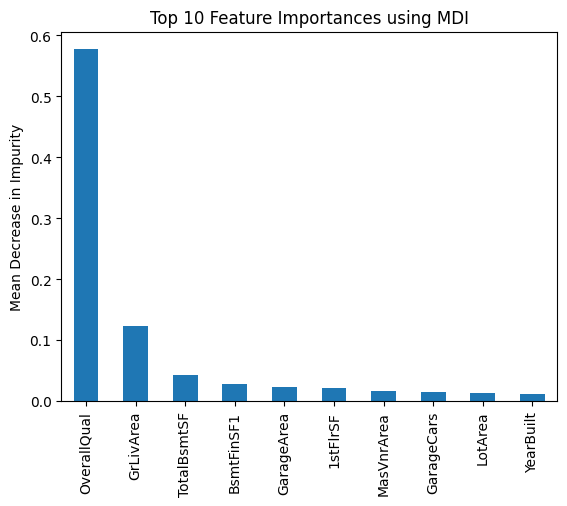

In [318]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have forest_importances calculated
forest_importances = pd.Series(importances, index=X_test.columns)

# Sort the feature importances
sorted_importances = forest_importances.sort_values(ascending=False)

# Select the top 10 features
top_10_importances = sorted_importances[:10]
print(top_10_importances)

# Plot the top 10 features
fig, ax = plt.subplots()
top_10_importances.plot(kind='bar', ax=ax)
ax.set_title("Top 10 Feature Importances using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()
